In [90]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

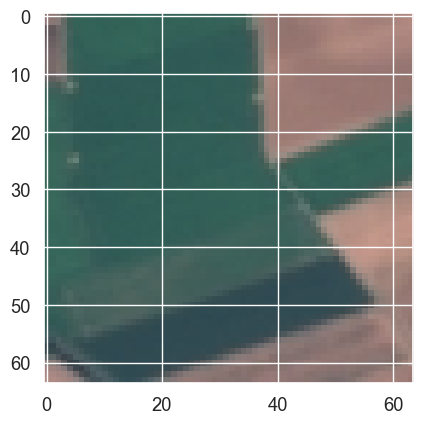

In [91]:
img = cv2.imread('AnnualCrop_7.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

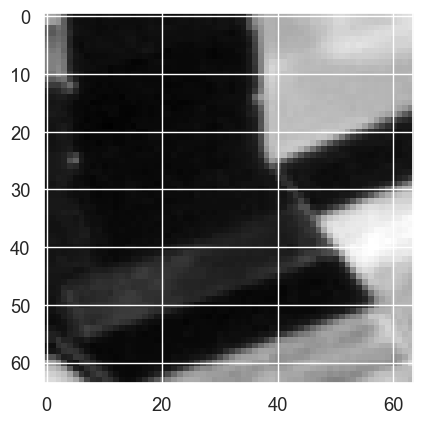

In [92]:
red_ch = img[:,:,0]
plt.imshow(red_ch,cmap='gray')
plt.show()

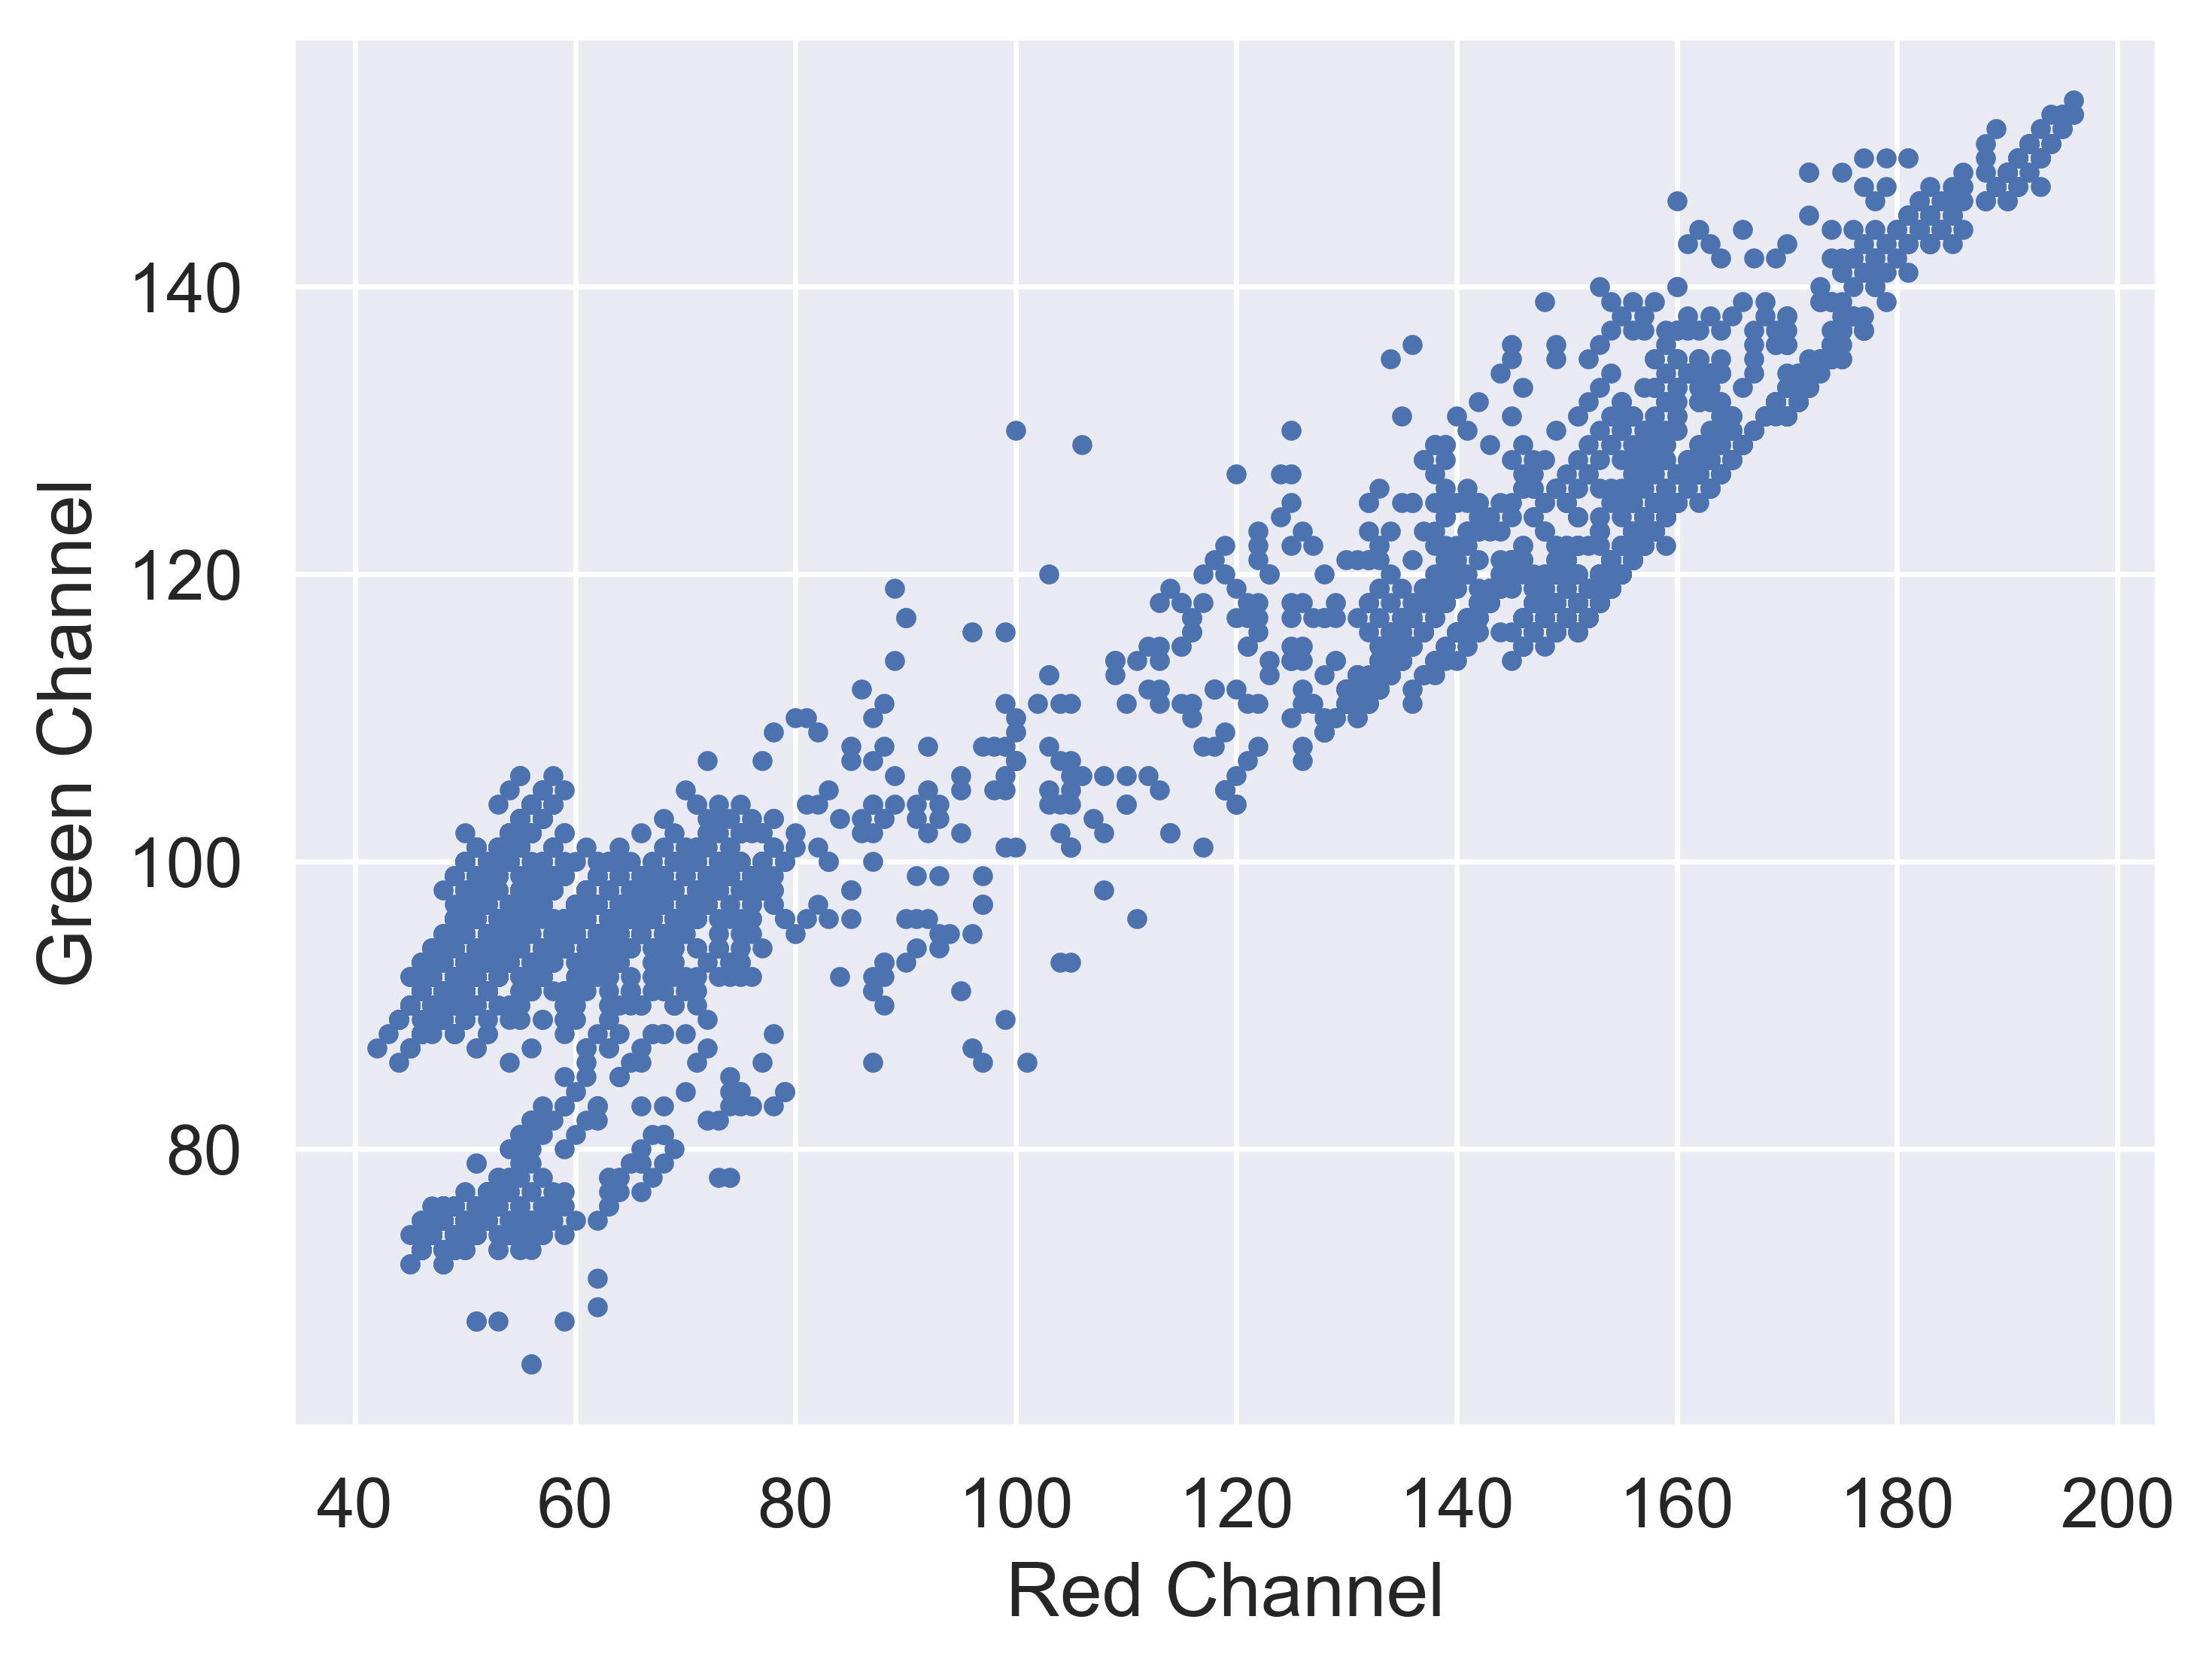

In [93]:
red_px = red_ch.flatten()
green_px = green_ch.flatten()
blue_px = blue_ch.flatten()

plt.figure(dpi=500)
plt.scatter(red_px, green_px, s=8, marker='o')

plt.xlabel('Red Channel')
plt.ylabel('Green Channel')
plt.show()

The scatterplot displays the relationship between two spectral bands (red and green), showing how their values are distributed relative to each other.

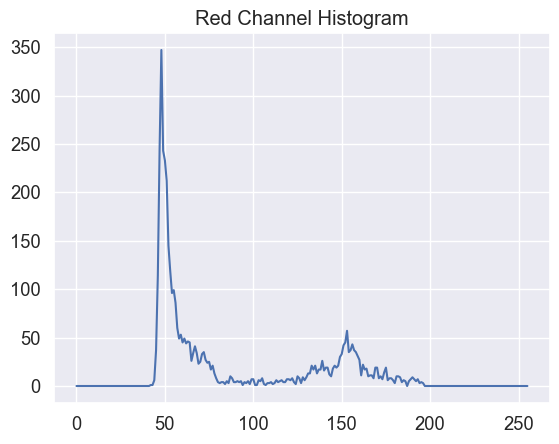

In [94]:
hist_red = cv2.calcHist([img],[0],None,[256],[0,256])
hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
hist_blue = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_red)
plt.title('Red Channel Histogram')
plt.show()

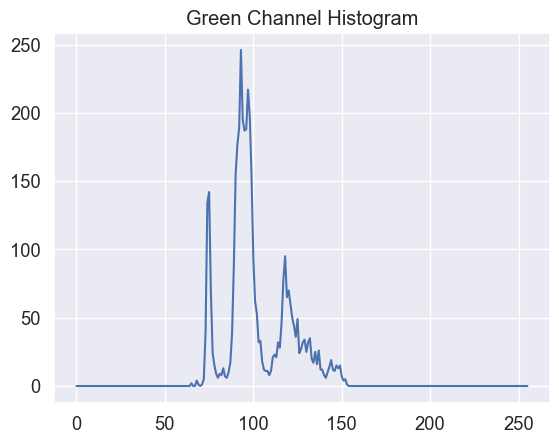

In [95]:
hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(hist_green)
plt.title('Green Channel Histogram')
plt.show()

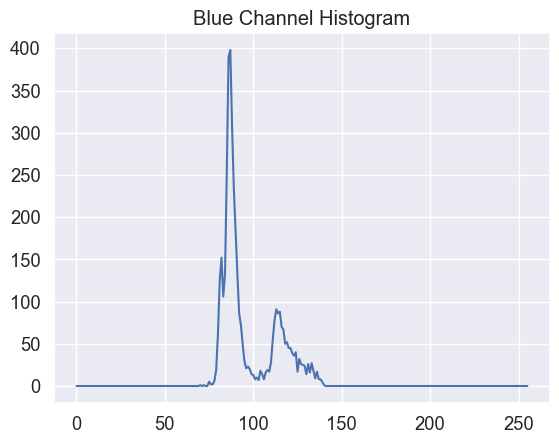

In [96]:
hist_blue = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_blue)
plt.title('Blue Channel Histogram')
plt.show()

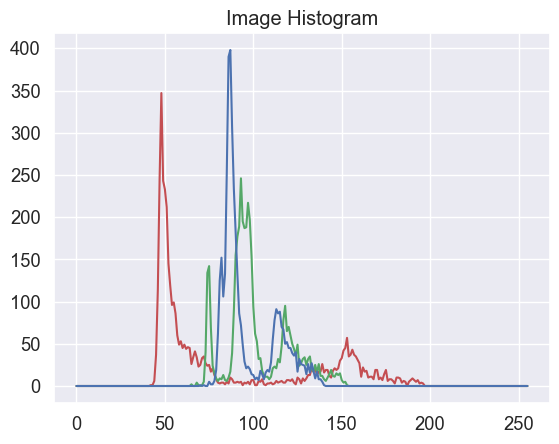

In [97]:
colors = ('r','g','b') 

for i,color in enumerate(colors): 
    hist = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.plot(hist,color = color) 
plt.title('Image Histogram') 
plt.show()

In [98]:
# Compute the correlation between each pair of bands
b_g_corr = np.correlate(blue_ch.flatten(), green_ch.flatten())
b_r_corr = np.correlate(blue_ch.flatten(), red_ch.flatten())
g_r_corr = np.correlate(green_ch.flatten(), red_ch.flatten())

# Print the correlation values
print(f"Blue-Green Correlation Coefficient: {b_g_corr[0]}")
print(f"Blue-Red Correlation Coefficient: {b_r_corr[0]}")
print(f"Green-Red Correlation Coefficient: {g_r_corr[0]}")


Blue-Green Correlation Coefficient: 176
Blue-Red Correlation Coefficient: 4
Green-Red Correlation Coefficient: 68


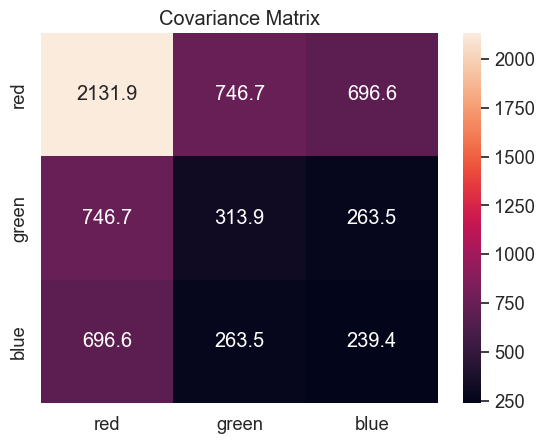

In [99]:
data = np.stack((red_px, green_px, blue_px), axis=-1)
covariance_matrix = np.cov(data, rowvar=False)
sns.set(font_scale=1.2)
plt.figure()
plt.title('Covariance Matrix')
sns.heatmap(covariance_matrix,annot=True,fmt='.1f',xticklabels=['red','green','blue'],
            yticklabels=['red','green','blue'])
plt.show()